In [4]:
import webdriver_manager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from IPython.display import clear_output
import time
import pandas as pd
import IPython

In [5]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [144]:
def login():
    driver.get("https://ocs.iitd.ac.in/portal/login")
    ID = "phs217181"
    password = input("Enter your password: ")
    driver.get("https://ocs.iitd.ac.in/portal/login")
    driver.find_element(By.ID, "mat-input-0").send_keys(ID)
    driver.find_element(By.ID, "mat-input-1").send_keys(password)
    captcha = driver.find_element(By.TAG_NAME, "object")
    captcha.screenshot("captcha.png")
    IPython.display.display(IPython.display.Image("captcha.png"))
    captcha_code = input("Enter the captcha code: ")
    driver.find_element(By.ID, "mat-input-2").send_keys(captcha_code)
    driver.find_element(By.TAG_NAME, "button").click()

In [160]:
def list_companies(url = "https://ocs.iitd.ac.in/portal/student/applications", class1= "mat-select-value-5", class2 = "mat-option-14"):
    driver.get(url)
    driver.find_element(By.ID, class1).click()
    driver.find_element(By.ID, class2).click()
    max_rows = int(driver.find_element(By.CLASS_NAME, "mat-paginator-range-label").text.split(" ")[-1])
    return max_rows

In [146]:
def result(max_rows):
    companies = []
    profiles = []
    page_num = 0
    per_page = 50
    while page_num*per_page<=max_rows:
        print(f"Currently on page {page_num+1}")
        table = driver.find_element(By.TAG_NAME, "table")
        rows = table.find_elements(By.TAG_NAME, "tr")
        for i in range(1, len(rows)):
            data = rows[i].find_element(By.TAG_NAME, "td").text.split("\n")[0]
            company = data.split("(")[0]
            profile = data.split("(")[1].split(")")[0]
            companies.append(company.strip())
            profiles.append(profile.strip())
        next_btn = driver.find_elements(By.CLASS_NAME, "mat-button-wrapper")[1]
        next_btn.click()
        page_num+=1
    all_companies = pd.DataFrame([companies, profiles]).T
    all_companies.columns = ["Company", "Profile"]
    return all_companies

In [169]:
def logout():
    for item in driver.find_elements(By.TAG_NAME ,"mat-icon"):
        if item.text == "exit_to_app":
            item.click()
            return None

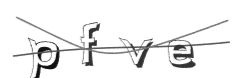

In [171]:
login()

## MSC List

In [163]:
max_rows = list_companies()
msc_df = result(max_rows=max_rows)

Currently on page 1
Currently on page 2


In [173]:
msc_df

,Company,Profile
0,DMI Finance,Data Scientist
1,Sony Group Corporation,JAF1 : XR System Engineer
2,Sony Group Corporation,JAF2 : Software and Hardware engineer for Robo...
3,Sony Group Corporation,JAF3 : Visual Recognition Computation Systems ...
4,Sony Group Corporation,"JAF4 : Software Engineer, Parallel Programming..."
...,...,...
89,Honda R&D,5
90,Apport Software Solutions Private Ltd,UX Designer
91,Zupee,Founder's Team
92,Morgan Stanley,Strats and Quants


## All List

In [164]:
url = "https://ocs.iitd.ac.in/portal/student/companies"
class1= "mat-select-value-3"
class2 = "mat-option-10"
max_rows = list_companies(url = url, class1=class1, class2=class2)
all_df = result(max_rows=max_rows)

Currently on page 1
Currently on page 2
Currently on page 3
Currently on page 4
Currently on page 5
Currently on page 6
Currently on page 7
Currently on page 8
Currently on page 9
Currently on page 10
Currently on page 11


In [174]:
all_df

,Company,Profile
0,Inito,JRS Biotechnology
1,AlphaGrep Securities,Quantitative Trading Analyst
2,AlphaGrep Securities,Software Developer
3,Cohesity,Member of Technical Staff
4,Cohesity,Member of Technical Staff
...,...,...
498,Wipro Enterprises,P
499,WorldQuant,Quantitative Researcher
500,zHealth,Software Development Engineer I
501,Zomato Limited,Sde


In [172]:
logout()

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=106.0.5249.119)
Stacktrace:
#0 0x56100010e2c3 <unknown>
#1 0x560ffff1783a <unknown>
#2 0x560ffff1a9d7 <unknown>
#3 0x560ffff1a877 <unknown>
#4 0x560ffff1ab3c <unknown>
#5 0x560ffff4b21b <unknown>
#6 0x560ffff6ef42 <unknown>
#7 0x560ffff45073 <unknown>
#8 0x560ffff6f0ae <unknown>
#9 0x560ffff86a50 <unknown>
#10 0x560ffff6ed63 <unknown>
#11 0x560ffff437e3 <unknown>
#12 0x560ffff44a21 <unknown>
#13 0x56100015c18e <unknown>
#14 0x56100015f622 <unknown>
#15 0x561000142aae <unknown>
#16 0x5610001602a3 <unknown>
#17 0x561000136ecf <unknown>
#18 0x561000180588 <unknown>
#19 0x561000180706 <unknown>
#20 0x56100019a8b2 <unknown>
#21 0x7f85fe1eeb43 <unknown>


In [ ]:
driver.close()

In [132]:
driver.get("https://ocs.iitd.ac.in/portal/student/applications")
driver.find_element(By.ID, "mat-select-value-5").click()
driver.find_element(By.ID, "mat-option-14").click()

In [133]:
max_rows = int(driver.find_element(By.CLASS_NAME, "mat-paginator-range-label").text.split(" ")[-1])
max_rows

94

In [134]:
companies = []
profiles = []
page_num = 0
per_page = 50
while page_num*per_page<=max_rows:
    print(f"Currently on page {page_num+1}")
    table = driver.find_element(By.TAG_NAME, "table")
    rows = table.find_elements(By.TAG_NAME, "tr")
    for i in range(1, len(rows)):
        data = rows[i].find_element(By.TAG_NAME, "td").text.split("\n")[0]
        company = data.split("(")[0]
        profile = data.split("(")[1].split(")")[0]
        companies.append(company.strip())
        profiles.append(profile.strip())
    next_btn = driver.find_elements(By.CLASS_NAME, "mat-button-wrapper")[1]
    next_btn.click()
    page_num+=1

Currently on page 1
Currently on page 2


In [135]:
all_companies = pd.DataFrame([companies, profiles]).T
all_companies.columns = ["Company", "Profile"]
all_companies

,Company,Profile
0,DMI Finance,Data Scientist
1,Sony Group Corporation,JAF1 : XR System Engineer
2,Sony Group Corporation,JAF2 : Software and Hardware engineer for Robo...
3,Sony Group Corporation,JAF3 : Visual Recognition Computation Systems ...
4,Sony Group Corporation,"JAF4 : Software Engineer, Parallel Programming..."
...,...,...
89,Honda R&D,5
90,Apport Software Solutions Private Ltd,UX Designer
91,Zupee,Founder's Team
92,Morgan Stanley,Strats and Quants


In [ ]:
def logout():
    for item in driver.find_elements(By.TAG_NAME ,"mat-icon"):
        if item.text == "exit_to_app":
            item.click()

In [168]:
for item in driver.find_elements(By.TAG_NAME ,"mat-icon"):
    if item.text == "exit_to_app":
        item.click()

chevron_left
home
assignment
public
exit_to_app
notifications
account_circle
vpn_key
speaker_notes
speaker_notes
speaker_notes
